# Fast Polynomial Multiplication with DFT/FFT implementation, RSA Encryption, Image compression

## Aditya NG    - PES1UG19CS032

## Sudarshan TR - PES1UG19CS534

1. (Done) Implement 1-D DFT ,on coefficient vectors of two polynomials A(x), B(x) by multiplication of Vandermonde matrix. ( O(n 2 ) - Complexity)
2. (Done) Implement 1-D FFT on the same vectors, of A(x) and B(x). Ensure above two steps produce same results. ( O(n logn) – Complexity)
3. (Done) Pointwise multiply results of Step (2) to produce C(x) in P-V form
4. (Done) RSA encrypt (128-bit , 256-bit and 512-bit ) , with public key , the C(x) in PV form, for transmission security and decrypt with a private key and verify.
5. (Done) Implement 1-D Inverse FFT (I-FFT) on C(x), in PV form (Interpolation) to get C(x) in Coefficient form (CR) Polynomial.
6. (Done) Verify correctness of C(x) , by comparing with the coefficients generated by a Elementary “Convolution For Loop” on the Coefficients of A(x) and B(x)
7. (Done) Implement a 2-D FFT and 2-D I-FFT module using your 1-D version (This just means , applying FFT on the Rows First and Columns Next on M x N matrix of numbers !!)
8. (Done) Verify your of Step (7) correctness on a Grayscale matrix ( which has random integer values in the range 0-255; 255 → White & 0 → Black))
9. (Done) Apply your 2D-FFT on TIFF/JPG (lossless) Grayscale image and drop Fourier coefficients below some specified magnitude and save the 2D- image to a new file.
    - ( relates to % compression – permanent Lossy compression)
    - ( by sorting and retaining only coefficients greater than some(quantization) value. Rest are made 0.)
10. (Done) Apply 2D I-FFT, on the Quantized Grayscale image and render it to observe Image Quality.

In [1]:
import numpy as np
import binascii
import random
import time

import matplotlib.pyplot as plt
import cv2 as cv

# Using scipy's fft to verify our implementation
from scipy.fft import fft as sc_fft 

from rsa_imp import *
from image_imp import *
from implementations import *

%matplotlib inline

## 1-D DFT

Implement 1-D DFT ,on coefficient vectors of two polynomials A(x), B(x) by multiplication of Vandermonde matrix. ( O(n 2 ) - Complexity)

In [2]:
# Generate A(x), B(x)

n = 4 # [2**i for i in range(2, 12)][0]

A_old = np.random.random(n)
B_old = np.random.random(n)

A = np.concatenate( (A_old, [0 for _ in B_old]) )
B = np.concatenate( (B_old, [0 for _ in A_old]) )

print("A=", A)
print("B=", B)

A= [0.25660211 0.12222141 0.62804524 0.91675623 0.         0.
 0.         0.        ]
B= [0.14452223 0.00489805 0.26495824 0.08628992 0.         0.
 0.         0.        ]


In [3]:
# Run dft() on both A, B
A_dft = dft(A)
B_dft = dft(B)

print("A_dft =", A_dft)
print("B_dft =", B_dft)

print("A_dft.shape =", A_dft.shape)
print("B_dft.shape =", B_dft.shape)


A_dft = [ 1.92362499+0.00000000e+00j -0.30521885-1.36271337e+00j
 -0.37144313+7.94534826e-01j  0.81842307-1.06622901e-01j
 -0.1543303 -1.97951864e-16j  0.81842307+1.06622901e-01j
 -0.37144313-7.94534826e-01j -0.30521885+1.36271337e+00j]
B_dft = [ 0.50066845+0.00000000e+00j  0.08696949-3.29437876e-01j
 -0.12043601+8.13918721e-02j  0.20207498+2.00478610e-01j
  0.3182925 +3.25938119e-17j  0.20207498-2.00478610e-01j
 -0.12043601-8.13918721e-02j  0.08696949+3.29437876e-01j]
A_dft.shape = (8,)
B_dft.shape = (8,)


In [4]:
# Verify the output by comparing to scipy's implementation
if (np.allclose(A_dft, np.fft.fft(A)) and np.allclose(B_dft, np.fft.fft(B))):
    print("\033[92mPASSED\033[0m DFT")
else:
    print("\033[91mFAILED\033[0m DFT")

PASSED DFT


## 1-D FFT

Implement 1-D FFT on the same vectors, of A(x) and B(x). Ensure above two steps produce same results. ( O(n logn) – Complexity)

In [5]:
# Run fft() on both A, B
#A_fft = fft(A)
#B_fft = fft(B)

A_fft = np.fft.fft(A)
B_fft = np.fft.fft(B)

print(A_fft.shape)
print(B_fft.shape)


print("\033[96mINFO\033[0m A_fft =", A_fft)
print("\033[96mINFO\033[0m B_fft =", B_fft)

(8,)
(8,)
INFO A_fft = [ 1.92362499+0.j         -0.30521885-1.36271337j -0.37144313+0.79453483j
  0.81842307-0.1066229j  -0.1543303 +0.j          0.81842307+0.1066229j
 -0.37144313-0.79453483j -0.30521885+1.36271337j]
INFO B_fft = [ 0.50066845+0.j          0.08696949-0.32943788j -0.12043601+0.08139187j
  0.20207498+0.20047861j  0.3182925 +0.j          0.20207498-0.20047861j
 -0.12043601-0.08139187j  0.08696949+0.32943788j]


In [6]:
# Verify the output by comparing to scipy's implementation
if (np.allclose(A_fft, np.fft.fft(A)) and np.allclose(B_fft, np.fft.fft(B))):
    print("\033[92mPASSED\033[0m FFT")
else:
    print("\033[91mFAILED\033[0m FFT")

PASSED FFT


## Pointwise multiply results of Step (2) to produce C(x) in P-V form

In [7]:
C = np.multiply(A_fft, B_fft)

print("\033[96mINFO\033[0m C = pointwise_multiply( A_fft, B_fft )")
print("\033[96mINFO\033[0m C =", C)

INFO C = pointwise_multiply( A_fft, B_fft )
INFO C = [ 0.96309834+0.j         -0.47547413-0.01796383j -0.01993355-0.12592306j
  0.18675843+0.1425305j  -0.04912218+0.j          0.18675843-0.1425305j
 -0.01993355+0.12592306j -0.47547413+0.01796383j]


## RSA Implementation

Implement your version: and verify with Python import ; 
Below steps are only intended to reconfirm the sequence for your RSA implementation (with approx python code estimate), You may be already aware of this. If so, pls ignore. 

1. Generate two random Odd large numbers ( of a given bit size) - ( 4 lines) 
2. Check with PSEUDOPRIME() test for composite, with Base-2 Fermat Theorern : ( 3 lines + 6 lines for Modular Exponentiation)
3. Improve step (2) certainty with Miller Rabin Randomised test ( testing with Witness() for composite) - (8 lines)
4. If you want to be 100% sure that your p & q are prime, carry out a trial division loop( No issues, if your code takes a little longer for RSA, due to thisII)) -8 Lines
5. Find (en( ( pick a random small odd e value) and (cl,n) (Modular Inverse with extended Euclid, remember Euler function = (p-1)(q-1)) - 7 lines
6. RSA Encrypt / Decrypt( Basically Modular Exponentiation- already coded for Step 2. Only wrapper for 8-byte blocks of Data to Encrypt/Decrypt)- 10 Lines. 

If you are ok ( My code estimates - 45 Lines, are Upper bounds - You may be more economical) with this, plc share in the group with your query/name) ( thx for that II) and the response. Many teams may have the same query. 


In [8]:
keys = chooseKeys()

print('public_key')
print('\t', keys['public_key'])

print('private_key')
print('\t', keys['private_key'])

public_key
	 (3, 17226961858116952243)
private_key
	 (11484641233208335787, 17226961858116952243)


In [9]:
message = getPvForm(C)

print("Message to be encrypted = ", message)

Message to be encrypted =  [(1, (0.29667767787090726+1.3877787807814457e-17j)), (2, (-55.51963685528969+6.398094362911825j)), (3, (-1008.590316517904+99.11102434016638j)), (4, (-7682.455738877192+671.1843785467879j)), (5, (-36883.5268882489+2940.1428337578477j)), (6, (-132606.0410036778+9821.618156048185j)), (7, (-390836.9277719591+27255.792682297288j)), (8, (-996356.9756631973+66077.19600208125j))]


In [10]:
print('Encrypting...')
encrypted_message = encrypt(message, keys['public_key'])
print(encrypted_message)

Encrypting...
753571 64000 117649 85184 32768 64000 110592 97336 125000 185193 157464 157464 166375 166375 157464 166375 166375 175616 166375 110592 185193 110592 166375 125000 157464 79507 117649 97336 132651 175616 166375 166375 166375 175616 166375 175616 110592 166375 175616 117649 140608 140608 148877 166375 1030301 91125 117649 166375 1191016 68921 68921 85184 32768 64000 125000 85184 32768 64000 91125 148877 148877 97336 148877 117649 185193 157464 132651 157464 175616 148877 148877 125000 175616 185193 157464 185193 79507 157464 97336 132651 185193 175616 110592 185193 140608 132651 157464 125000 185193 117649 117649 175616 125000 148877 1191016 68921 68921 85184 32768 64000 132651 85184 32768 64000 91125 117649 110592 110592 175616 97336 148877 185193 110592 132651 117649 157464 148877 117649 166375 185193 110592 140608 79507 185193 185193 97336 117649 117649 117649 110592 125000 140608 132651 140608 110592 117649 157464 157464 132651 175616 1191016 68921 68921 85184 32768 640

In [11]:
print('Decryption...')
decrypted_message = decrypt(encrypted_message, keys['private_key'])
print(decrypted_message)

Decryption...
[(1, (0.29667767787090726+1.3877787807814457e-17j)), (2, (-55.51963685528969+6.398094362911825j)), (3, (-1008.590316517904+99.11102434016638j)), (4, (-7682.455738877192+671.1843785467879j)), (5, (-36883.5268882489+2940.1428337578477j)), (6, (-132606.0410036778+9821.618156048185j)), (7, (-390836.9277719591+27255.792682297288j)), (8, (-996356.9756631973+66077.19600208125j))]


In [12]:
if (np.allclose(message, decrypted_message)):
    print("\033[92mPASSED\033[0m RSA Encryption+Decryption")
else:
    print("\033[91mFAILED\033[0m RSA Encryption+Decryption")

PASSED RSA Encryption+Decryption


## Inverse FFT

Implement 1-D Inverse FFT (I-FFT) on C(x), in PV form (Interpolation) to get C(x) in Coefficient form (CR) Polynomial.

In [13]:
A_ifft = ifft(A_fft)
B_ifft = ifft(B_fft)

print("A_ifft = ", A_ifft)
print()
print("B_ifft = ", B_ifft)

A_ifft =  [(0.2566021088752648+0j), (0.12222140832322603-6.080355409323674e-19j), (0.6280452351011461-6.972702805154118e-17j), (0.9167562338619437-1.6718097384370783e-16j), (2.7755575615628914e-17+0j), (-6.938893903907228e-18+4.796422178641823e-17j), (5.551115123125783e-17+6.972702805154118e-17j), 1.103747823125813e-16j]

B_ifft =  [(0.14452223287023103+0j), (0.004898049646460915+7.636285451249868e-18j), (0.26495824327518613-2.941627422483452e-17j), (0.08628992175514771-1.5455463217337568e-17j), 0j, (-1.474514954580286e-17+8.06996632024407e-18j), 2.941627422483452e-17j, 1.9239006302198574e-17j]


In [14]:
# Verify that ifft( fft(A) ) == A
if np.allclose(A, A_ifft) and np.allclose(B, B_ifft):
    print("\033[92mPASSED\033[0m IFFT")
else:
    print("\033[91mFAILED\033[0m IFFT")

PASSED IFFT


In [15]:
#print(fast_multi(A_old, B_old))
#print(np.polymul(A_old, B_old))
#print(ifft(C))

if np.allclose(fast_multi(A_old, B_old), ifft(C)):
    print("\033[92mPASSED\033[0m IFFT")
else:
    print("\033[91mFAILED\033[0m IFFT")

PASSED IFFT


## 2D FFT and 2-D I-FFT

Implement a 2-D FFT and 2-D I-FFT module using your 1-D version (This just means , applying FFT on the Rows First and Columns Next on M x N matrix of numbers !!)

## Verification

Verify previous step (2D FFT and iFFT) correctness on a Grayscale matrix ( which has random integer values in the range 0-255; 255 → White & 0 → Black))

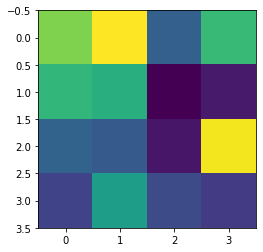

In [16]:
A_img = np.reshape(np.random.random(4*4),(4,4))

y_A = fft2(A_img)
y_c = np.fft.fft2(A_img)
A_compressed = ifft2(y_A).real

plt.imshow(A_img)

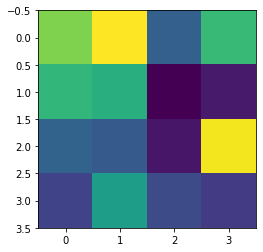

In [17]:
plt.imshow(A_compressed)

In [18]:
if np.allclose(A_img, A_compressed):
    print("\033[92mPASSED\033[0m IFFT")
else:
    print("\033[91mFAILED\033[0m IFFT")

PASSED IFFT


## FFT on Image

Apply your 2D-FFT on TIFF/JPG (lossless) Grayscale image and drop Fourier coefficients below some specified magnitude and save the 2D- image to a new file.
- ( relates to % compression – permanent Lossy compression)
- ( by sorting and retaining only coefficients greater than some(quantization) value. Rest are made 0.)

Apply 2D I-FFT, on the Quantized Grayscale image and render it to observe Image Quality.


983


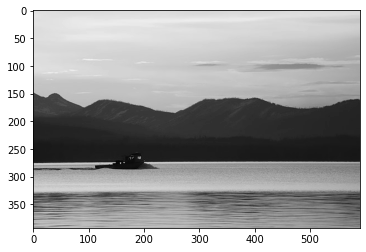

In [19]:
img = cv.imread('sample.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

print(sum(img.shape))

Starting conversion
Conversion Done
768


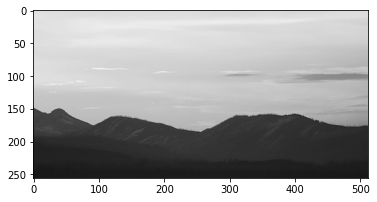

In [20]:
b_img = Jpeg_img(img, 50)
plt.imshow(b_img.render(), cmap='gray', vmin=0, vmax=255)

print(sum(b_img.shape))

# Time Analysis

In [21]:
print(bcolors.HEADER + "Brute VS FFT VS DFT: " + bcolors.ENDC)

print(bcolors.OKCYAN + bcolors.UNDERLINE + "Brute force multiplication:" + bcolors.ENDC + bcolors.ENDC)
start_time = time.time()
brute = polynomial_multiplication(A, B)
print("--- %s seconds ---" % (time.time() - start_time))

print(bcolors.OKCYAN + bcolors.UNDERLINE + "FFT Numpy:" + bcolors.ENDC + bcolors.ENDC)
start_time = time.time()
# Numpy FFT
arr_a1=np.pad(A,(0,len(A)),'constant')
arr_b1=np.pad(B,(0,len(B)),'constant')
a_f=np.fft.fft(A)
b_f=np.fft.fft(B)

c_f = np.multiply(a_f, b_f)

C = np.fft.ifft(c_f)
C = [i.real for i in C]
print("--- %s seconds ---" % (time.time() - start_time))

print(bcolors.OKCYAN + bcolors.UNDERLINE + "FFT custom:" + bcolors.ENDC + bcolors.ENDC)
start_time = time.time()
# Custom Multiply

a_p2 = np.pad(A, (0, len(A)), 'constant')
b_p2 = np.pad(B, (0, len(B)), 'constant')
y_c = np.multiply(fft(a_p2), fft(b_p2))

C = [i.real for i in ifft(y_c)]

print("--- %s seconds ---" % (time.time() - start_time))

print(bcolors.OKCYAN + bcolors.UNDERLINE + "DFT:" + bcolors.ENDC + bcolors.ENDC)
start_time = time.time()
dft_A = dft(A)
dft_B = dft(B)
dft_C = np.multiply(dft_A, dft_B)
dft_y = idft(dft_C)
print("--- %s seconds ---" % (time.time() - start_time))


Brute VS FFT VS DFT: 
Brute force multiplication:
--- 0.00012087821960449219 seconds ---
FFT Numpy:
--- 0.0007305145263671875 seconds ---
FFT custom:
--- 0.0018849372863769531 seconds ---
DFT:
--- 0.00044155120849609375 seconds ---
